In [6]:
# PART A - DATA TRANSFORMATION

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [8]:
# (a):Loanding dataset into a DataFrame

df = pd.read_csv("C:\\Users\\Aynur\\Downloads\\Sales_Sample_Public_Dataset.csv", encoding='ISO-8859-1')  # Replace with the correct encoding

In [9]:
# (b):Show the first few rows of the loaded dataset
df.tail(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/02/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/01/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/06/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [10]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [11]:
df.shape

(2823, 25)

In [12]:
df['TERRITORY'].unique()

array([nan, 'EMEA', 'APAC', 'Japan'], dtype=object)

In [13]:
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [14]:
df[['COUNTRY','TERRITORY']].tail(5)

,COUNTRY,TERRITORY
2818,Spain,EMEA
2819,Finland,EMEA
2820,Spain,EMEA
2821,France,EMEA
2822,USA,NaN


In [15]:
# Update the 'TERRITORY' columns
df.loc[df['COUNTRY'].isin(['USA', 'Canada']), 'TERRITORY'] = 'AMERICA'
df.loc[df['COUNTRY'].isin(['Australia', 'Singapore','Japan','Philippines']), 'TERRITORY'] = 'APAC'
# Verify the update
print(df[['COUNTRY', 'TERRITORY']].tail(5))


      COUNTRY TERRITORY
2818    Spain      EMEA
2819  Finland      EMEA
2820    Spain      EMEA
2821   France      EMEA
2822      USA   AMERICA


In [16]:
df['TERRITORY'].unique()

array(['AMERICA', 'EMEA', 'APAC'], dtype=object)

In [17]:
df['COUNTRY'].nunique()

19

In [18]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [19]:
# Convert the 'ORDERDATE' column (object) to datetime format
df['ORDERDATE']=pd.to_datetime(df['ORDERDATE'], errors='coerce')

In [20]:
# Convert the 'POSTALCODE' from object to numeric
df["POSTALCODE"] = pd.to_numeric(df["POSTALCODE"], errors="coerce").astype("Int64")


In [21]:
df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                   Int64
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [22]:
# (c):Apply three operations to handle missing values in a dataset
# Find the missing values
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE           541
COUNTRY                0
TERRITORY              0
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [23]:
# :Checking missing values based on mode('ADDRESSLINE2','STATE' and 'TERRITORY' are object)
#df['ADDRESSLINE2'] = df['ADDRESSLINE2'].fillna(df['ADDRESSLINE2'].mode()[0])
#df['POSTALCODE'] = df['POSTALCODE'].fillna(df['POSTALCODE'].mode()[0])
#df['STATE'] = df['STATE'].fillna(df['CITY'])
#print(df[['ADDRESSLINE2', 'STATE','POSTALCODE']].isnull().sum())

In [24]:
# Fill missing STATE values with 'Unknown'
df['STATE'].fillna('Unknown', inplace=True)

# Impute missing ADDRESSLINE2 with the most frequent value (mode)
df['ADDRESSLINE2'].fillna(df['ADDRESSLINE2'].mode()[0], inplace=True)

C:\Users\Aynur\AppData\Local\Temp\ipykernel_4176\388771444.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['STATE'].fillna('Unknown', inplace=True)
C:\Users\Aynur\AppData\Local\Temp\ipykernel_4176\388771444.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [25]:
# Handling missing values for numerical values (Age)
features = ['POSTALCODE']

for feature in features:
    # Convert to numeric (handle non-numeric values)
    df[feature] = pd.to_numeric(df[feature], errors="coerce")
    
    # Check for skewness
    skewness = df[feature].skew()
    print(f"Skewness of {feature}: {skewness:.2f}")
    
    # Handle missing values based on skewness
    if abs(skewness) < 0.5:  # Near-normal distribution
        df[feature] = df[feature].fillna(round(df[feature].mean())).astype("Int64")
        print(f"Missing values in '{feature}' filled with mean: {df[feature].mean():.2f}")
    else:  # Skewed distribution
        df[feature] = df[feature].fillna(df[feature].median()).astype("Int64")
        print(f"Missing values in '{feature}' filled with median: {df[feature].median():.2f}")


Skewness of POSTALCODE: 0.16
Missing values in 'POSTALCODE' filled with mean: 46823.05


In [26]:
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [27]:
#Delete the unneccessary columns
df.drop(['ORDERLINENUMBER','ORDERNUMBER','ADDRESSLINE1', 'ADDRESSLINE2', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME','PRODUCTCODE', 'PHONE'], axis=1, errors='ignore', inplace=True)
df

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE
0,30,95.70,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,Land of Toys Inc.,NYC,NY,10022,USA,AMERICA,Small
1,34,81.35,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,Reims Collectables,Reims,Unknown,51100,France,EMEA,Small
2,41,94.74,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,Lyon Souveniers,Paris,Unknown,75508,France,EMEA,Medium
3,45,83.26,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,Toys4GrownUps.com,Pasadena,CA,90003,USA,AMERICA,Medium
4,49,100.00,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,San Francisco,CA,46823,USA,AMERICA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,2244.40,2004-12-02,Shipped,4,12,2004,Ships,54,Euro Shopping Channel,Madrid,Unknown,28034,Spain,EMEA,Small
2819,29,100.00,3978.51,2005-01-31,Shipped,1,1,2005,Ships,54,"Oulu Toy Supplies, Inc.",Oulu,Unknown,90110,Finland,EMEA,Medium
2820,43,100.00,5417.57,2005-03-01,Resolved,1,3,2005,Ships,54,Euro Shopping Channel,Madrid,Unknown,28034,Spain,EMEA,Medium
2821,34,62.24,2116.16,2005-03-28,Shipped,1,3,2005,Ships,54,Alpha Cognac,Toulouse,Unknown,31000,France,EMEA,Small


In [28]:
# Sort by 'SALES' in descending order 
sorted_df = df.sort_values(by="SALES", ascending=False)

# Select only 'COUNTRY', 'STATE', 'CITY', and 'SALES' columns
sorted_df_selected = sorted_df[['COUNTRY', 'STATE', 'CITY' ,'TERRITORY','SALES','DEALSIZE']]

# Show the top 5 rows
print(sorted_df_selected.head())


     COUNTRY    STATE       CITY TERRITORY    SALES DEALSIZE
598      USA       CA   San Jose   AMERICA  14082.8    Large
744      USA       NH     Nashua   AMERICA  12536.5    Large
53     Spain  Unknown     Madrid      EMEA  12001.0    Large
1062   Spain  Unknown     Madrid      EMEA  11887.8    Large
104       UK  Unknown  Liverpool      EMEA  11886.6    Large


In [29]:
# Top 5 and bottom 5 countries based on sale
country_sales = df.groupby('COUNTRY')['SALES'].sum().reset_index()

# Sort by 'SALES' to get highest and lowest
highest_sales_df = country_sales.sort_values(by="SALES", ascending=False).head(5)
lowest_sales_df = country_sales.sort_values(by="SALES", ascending=True).head(5)

# Print the results
print("Top 5 Highest Sales by Country:")
print(highest_sales_df)

print("\nTop 5 Lowest Sales by Country:")
print(lowest_sales_df)


Top 5 Highest Sales by Country:
      COUNTRY       SALES
18        USA  3627982.83
14      Spain  1215686.92
6      France  1110916.52
0   Australia   630623.10
17         UK   478880.46

Top 5 Lowest Sales by Country:
        COUNTRY      SALES
8       Ireland   57756.43
12  Philippines   94015.73
2       Belgium  108412.62
16  Switzerland  117713.56
10        Japan  188167.81


In [30]:
# Top and bottom  based on sale
territory_sales = df.groupby('TERRITORY')['SALES'].sum().reset_index()

# Sort by 'SALES' to get highest and lowest
highest_sales_df = territory_sales.sort_values(by="SALES", ascending=False).head(1)
lowest_sales_df = territory_sales.sort_values(by="SALES", ascending=True).head(1)

# Print the results
print("Highest Sales by Territory:")
print(highest_sales_df)

print("\nLowest Sales by Territory:")
print(lowest_sales_df)

Highest Sales by Territory:
  TERRITORY       SALES
2      EMEA  4979272.41

Lowest Sales by Territory:
  TERRITORY       SALES
1      APAC  1201295.05


In [31]:
# Find the uniques values for 'YEAR_ID' for each 'MONTH_ID'
df.groupby('YEAR_ID')['MONTH_ID'].unique()

YEAR_ID
2003    [2, 5, 7, 8, 10, 11, 12, 1, 3, 9, 4, 6]
2004    [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 3]
2005                            [2, 3, 4, 5, 1]
Name: MONTH_ID, dtype: object

In [32]:
df.describe()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,POSTALCODE
count,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000,2823.0
mean,35.092809,83.658544,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551,46823.049947
min,6.000000,26.880000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000,2.0
25%,27.000000,68.860000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000,24100.0
50%,35.000000,95.700000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000,46823.0
75%,43.000000,100.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000,69045.0
max,97.000000,100.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000,97823.0
std,9.741443,20.174277,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912,30106.066226


In [33]:
# (e): Define a condition to filter transactions from the dataset.
filtered_df = df[(df['QUANTITYORDERED'] > 50) & (df['MONTH_ID'] < 6) & (df['YEAR_ID'] == 2005)]
filtered_df

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE
25,66,100.00,7516.08,2005-05-13,Disputed,2,5,2005,Motorcycles,95,Euro Shopping Channel,Madrid,Unknown,28034,Spain,EMEA,Large
104,66,100.00,11886.60,2005-04-08,Shipped,2,4,2005,Motorcycles,193,"UK Collectables, Ltd.",Liverpool,Unknown,46823,UK,EMEA,Large
105,56,100.00,9218.16,2005-05-13,Disputed,2,5,2005,Motorcycles,193,Euro Shopping Channel,Madrid,Unknown,28034,Spain,EMEA,Large
131,64,100.00,9661.44,2005-04-01,Shipped,2,4,2005,Classic Cars,136,The Sharp Gifts Warehouse,San Jose,CA,94217,USA,AMERICA,Large
264,66,100.00,8648.64,2005-04-08,Shipped,2,4,2005,Motorcycles,150,"UK Collectables, Ltd.",Liverpool,Unknown,46823,UK,EMEA,Large
392,54,100.00,5951.34,2005-05-03,Shipped,2,5,2005,Trucks and Buses,118,Euro Shopping Channel,Madrid,Unknown,28034,Spain,EMEA,Medium
418,97,93.28,9048.16,2005-04-14,Shipped,2,4,2005,Classic Cars,115,Mini Caravy,Strasbourg,Unknown,67000,France,EMEA,Large
447,54,100.00,7182.00,2005-05-31,In Process,2,5,2005,Trucks and Buses,116,Euro Shopping Channel,Madrid,Unknown,28034,Spain,EMEA,Large
473,61,100.00,8374.69,2005-04-15,Disputed,2,4,2005,Classic Cars,141,Danish Wholesale Imports,Kobenhavn,Unknown,1734,Denmark,EMEA,Large
500,51,95.55,4873.05,2005-05-30,In Process,2,5,2005,Vintage Cars,102,Diecast Classics Inc.,Allentown,PA,70267,USA,AMERICA,Medium


In [34]:
filtered_df = df[(df['QUANTITYORDERED'] > 50) & (df['MONTH_ID'] < 6) & (df['YEAR_ID'] == 2004)]
filtered_df

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE


In [35]:
filtered_df = df[(df['QUANTITYORDERED'] > 50) & (df['MONTH_ID'] < 6) & (df['YEAR_ID'] == 2003)]
filtered_df

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE


In [36]:
# (f): Create a new column to derive additional information.
df['TOTAL_ORDER']=df['QUANTITYORDERED']*df['PRICEEACH']
df[['QUANTITYORDERED','PRICEEACH','TOTAL_ORDER']]

,QUANTITYORDERED,PRICEEACH,TOTAL_ORDER
0,30,95.70,2871.00
1,34,81.35,2765.90
2,41,94.74,3884.34
3,45,83.26,3746.70
4,49,100.00,4900.00
...,...,...,...
2818,20,100.00,2000.00
2819,29,100.00,2900.00
2820,43,100.00,4300.00
2821,34,62.24,2116.16


In [37]:
#(g): Choose the categorical column and aggregate data based on it.
# Aggregating total sales by country
# Group by 'COUNTRY' and aggragate 'SALES'
sales_by_country = df.groupby('COUNTRY')[['SALES','TOTAL_ORDER']].sum().reset_index()
# Sort the result by SALES in ascending order
sales_by_country = sales_by_country.sort_values(by='SALES', ascending=True)
sales_by_country

,COUNTRY,SALES,TOTAL_ORDER
8,Ireland,57756.43,43237.24
12,Philippines,94015.73,80291.17
2,Belgium,108412.62,94528.88
16,Switzerland,117713.56,93344.91
10,Japan,188167.81,153076.69
1,Austria,202062.53,172793.05
15,Sweden,210014.21,174264.10
7,Germany,220472.09,178689.08
3,Canada,224078.56,193504.34
4,Denmark,245637.15,192747.63


In [38]:
#(g): Choose the categorical column and aggregate data based on it.
QuantityOrdered_by_country=df.groupby('COUNTRY')[['QUANTITYORDERED','TOTAL_ORDER','SALES']].sum().reset_index()
# Sort the result in ascending order
QuantityOrdered_by_country = QuantityOrdered_by_country.sort_values(by='QUANTITYORDERED', ascending=True)
QuantityOrdered_by_country

,COUNTRY,QUANTITYORDERED,TOTAL_ORDER,SALES
8,Ireland,490,43237.24,57756.43
12,Philippines,961,80291.17,94015.73
2,Belgium,1074,94528.88,108412.62
16,Switzerland,1078,93344.91,117713.56
10,Japan,1842,153076.69,188167.81
1,Austria,1974,172793.05,202062.53
15,Sweden,2006,174264.10,210014.21
7,Germany,2148,178689.08,220472.09
4,Denmark,2197,192747.63,245637.15
3,Canada,2293,193504.34,224078.56


In [39]:
# PART B - DATA ANALYSIS

In [40]:
# a: Group the dataset based on a categorical variable and calculate summary statistics.

In [41]:
# Group the dataset by COUNTRY
grouped = df.groupby('COUNTRY').agg(
    Total_Sales=('SALES', 'sum'),
    Average_Sales=('SALES', 'mean'),
    Total_Quantity=('QUANTITYORDERED', 'sum'),
    Average_Quantity=('QUANTITYORDERED', 'mean'),
    Max_Sales=('SALES', 'max'),
    Min_Sales=('SALES', 'min'),
    Count_Orders=('SALES', 'count')
).reset_index()

# Sort the data by Total_Sales in ascending order
grouped = grouped.sort_values(by='Total_Sales', ascending=False)

# Display the summary statistics
print(grouped)


        COUNTRY  Total_Sales  Average_Sales  Total_Quantity  Average_Quantity  \
18          USA   3627982.83    3613.528715           35659         35.516932   
14        Spain   1215686.92    3554.640117           12429         36.342105   
6        France   1110916.52    3537.950701           11090         35.318471   
0     Australia    630623.10    3408.773514            6246         33.762162   
17           UK    478880.46    3325.558750            5013         34.812500   
9         Italy    374674.31    3315.701858            3773         33.389381   
5       Finland    329581.91    3582.412065            3192         34.695652   
11       Norway    307463.70    3617.220000            2842         33.435294   
13    Singapore    288488.41    3651.752025            2760         34.936709   
4       Denmark    245637.15    3899.002381            2197         34.873016   
3        Canada    224078.56    3201.122286            2293         32.757143   
7       Germany    220472.09

In [42]:
encoded_df=pd.get_dummies(df,columns=['TERRITORY'],drop_first=True)
#Convert boolean columns to integers
for column in encoded_df.select_dtypes(include=['bool']).columns:
    encoded_df[column]=encoded_df[column].astype(int)
encoded_df.head()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,STATE,POSTALCODE,COUNTRY,DEALSIZE,TOTAL_ORDER,TERRITORY_APAC,TERRITORY_EMEA
0,30,95.70,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,Land of Toys Inc.,NYC,NY,10022,USA,Small,2871.00,0,0
1,34,81.35,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,Reims Collectables,Reims,Unknown,51100,France,Small,2765.90,0,1
2,41,94.74,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,Lyon Souveniers,Paris,Unknown,75508,France,Medium,3884.34,0,1
3,45,83.26,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,Toys4GrownUps.com,Pasadena,CA,90003,USA,Medium,3746.70,0,0
4,49,100.00,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,San Francisco,CA,46823,USA,Medium,4900.00,0,0


In [43]:
# b: Investigate the correlations between different variables in the dataset.

In [44]:
# Drop unnecessary columns
#columns_to_drop = ['ORDERNUMBER', 'ORDERLINENUMBER', 'ADDRESSLINE1', 'PHONE', 'ADDRESSLINE2', 'CITY', 'CONTACTLASTNAME','CONTACTFIRSTNAME','PRODUCTCODE','CUSTOMERNAME','STATUS']
#df = df.drop(columns=columns_to_drop)

In [45]:
for col in encoded_df.columns:
    encoded_df[col] = pd.to_numeric(encoded_df[col], errors='coerce')

In [46]:
numeric_df = encoded_df.select_dtypes(include=['number'])
correlation_Matrix = numeric_df.corr()

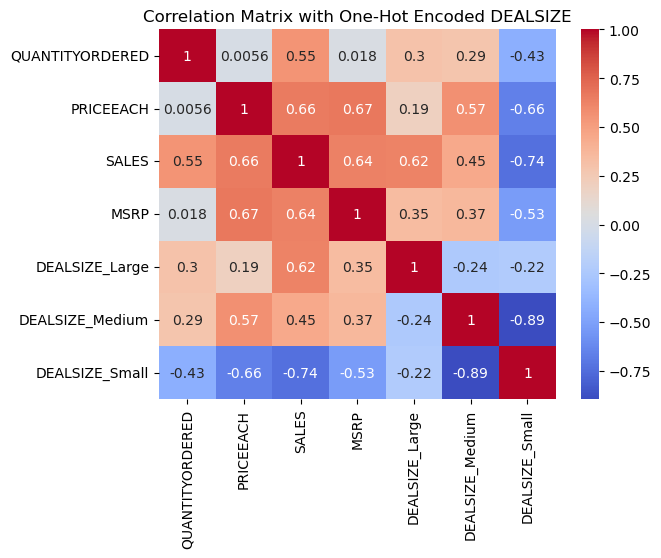

In [47]:
# One-hot encode 'DEALSIZE' without dropping the first category
df_encoded = pd.get_dummies(df, columns=['DEALSIZE'], drop_first=False)

# Now calculate the correlation matrix for all the numeric columns and one-hot encoded columns
correlation_matrix = df_encoded[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP'] + [col for col in df_encoded.columns if 'DEALSIZE_' in col]].corr()

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix with One-Hot Encoded DEALSIZE")
plt.show()


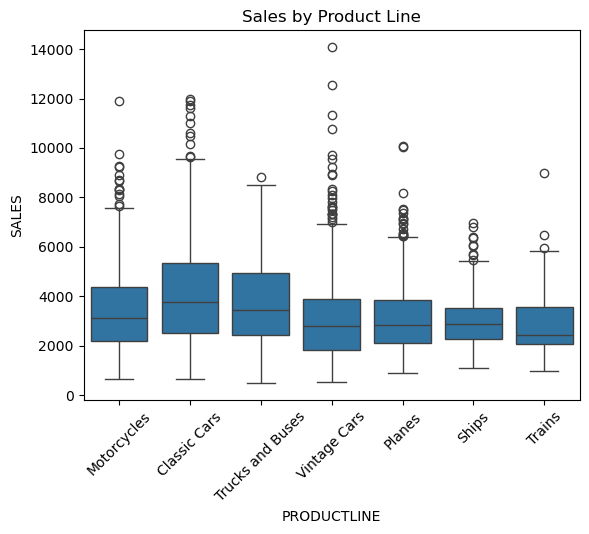

In [48]:
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df)
plt.title("Sales by Product Line")
plt.xticks(rotation=45)
plt.show()


In [49]:
# c: Export a dataset to a CSV file
df.to_csv("C:\\Users\\Aynur\\Desktop\\GDDA604\\Assessment2.csv",index=False)

In [50]:
# d: Perform data analysis and visualization

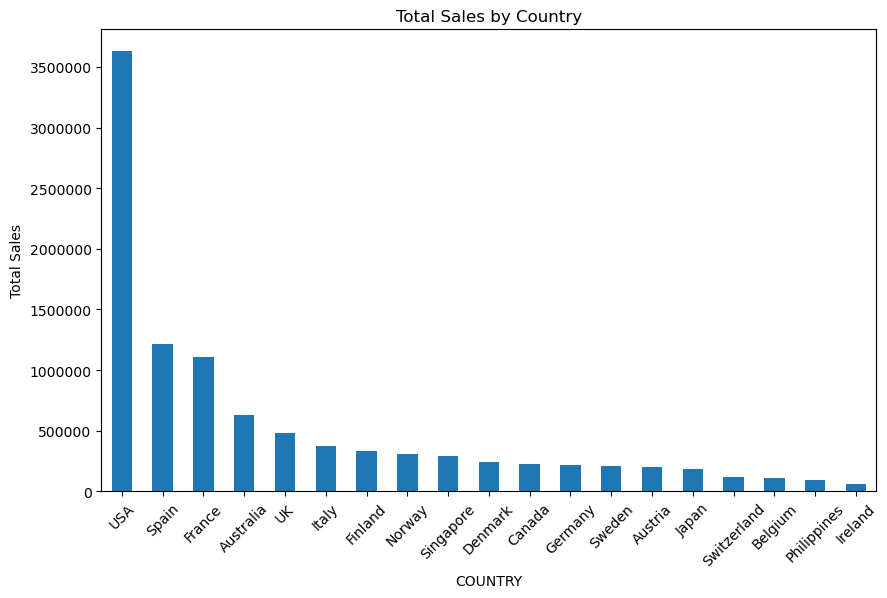

In [51]:
# Total sales by country
sales_by_country = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
sales_by_country.plot(kind='bar', figsize=(10, 6), title='Total Sales by Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

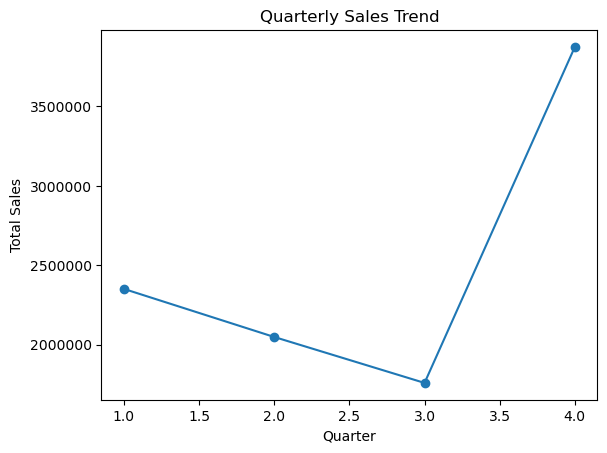

In [52]:
# Quarterly sales trend
quarterly_sales = df.groupby('QTR_ID')['SALES'].sum()
quarterly_sales.plot(kind='line', marker='o', title='Quarterly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Quarter')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

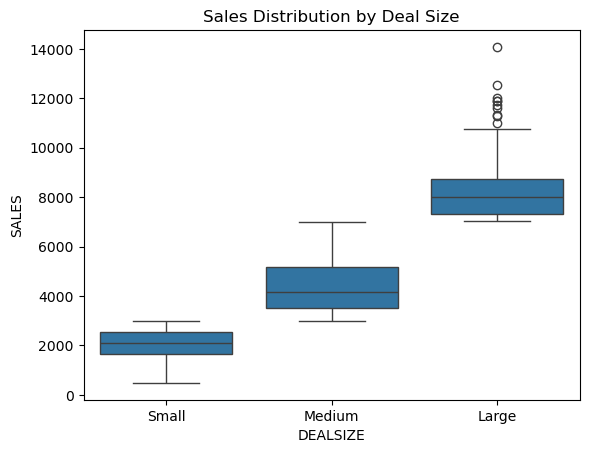

In [53]:
# Boxplot: Sales distribution by deal size
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.title('Sales Distribution by Deal Size')
plt.show()

In [54]:
# Group data by territories
territory_sales = df.groupby('TERRITORY').agg(
    Total_Sales=('SALES', 'sum'),
    Average_Sales=('SALES', 'mean'),
    Total_Orders=('QUANTITYORDERED', 'count')
).reset_index()

print(territory_sales)

  TERRITORY  Total_Sales  Average_Sales  Total_Orders
0   AMERICA   3852061.39    3586.649339          1074
1      APAC   1201295.05    3512.558626           342
2      EMEA   4979272.41    3538.928507          1407


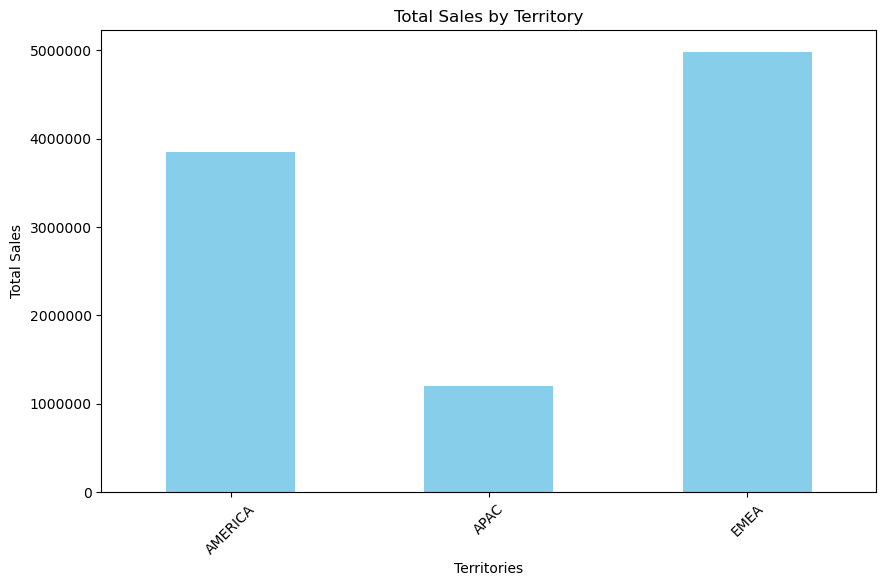

In [55]:
# Bar chart: Total sales by territory
territory_sales.set_index(['TERRITORY'])['Total_Sales'].plot(
    kind='bar', figsize=(10, 6), color='skyblue', title='Total Sales by Territory'
)
plt.ylabel('Total Sales')
plt.xlabel('Territories')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

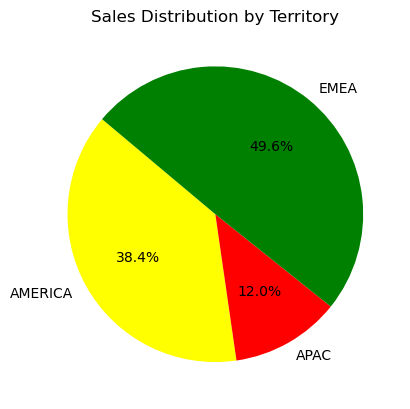

In [56]:
# Pie chart: Proportion of sales by territory
total_sales_territory = territory_sales['Total_Sales']
labels = territory_sales['TERRITORY']  # Automatically use the unique territories as labels
plt.pie(total_sales_territory, labels=labels, autopct='%1.1f%%', startangle=140, colors=['yellow','red','green', '#c2c2f0'])  # Add more colors as needed
plt.title('Sales Distribution by Territory')
plt.show()

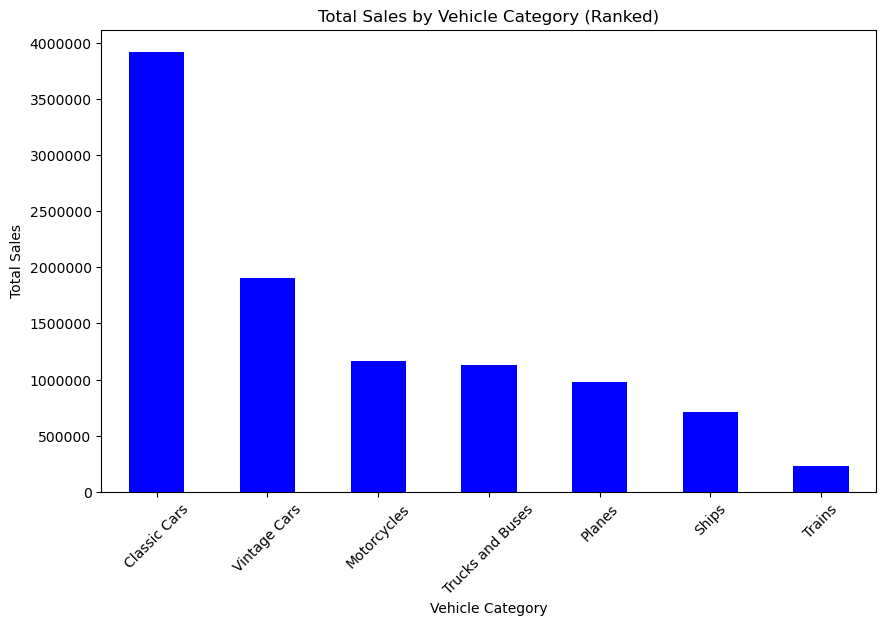

In [57]:
# Aggregate total sales by product line and sort by Total_Sales in descending order
vehicle_type_sales = df.groupby('PRODUCTLINE').agg(
    Total_Sales=('SALES', 'sum')).reset_index()

# Sort the DataFrame by Total_Sales in descending order
vehicle_type_sales = vehicle_type_sales.sort_values(by='Total_Sales', ascending=False)

# Bar chart visualization
vehicle_type_sales.set_index('PRODUCTLINE')['Total_Sales'].plot(
    kind='bar', figsize=(10, 6), color='blue', title='Total Sales by Vehicle Category (Ranked)')

plt.ylabel('Total Sales')
plt.xlabel('Vehicle Category')
plt.xticks(rotation=45)  # Rotate x labels to prevent overlap
plt.ticklabel_format(style='plain', axis='y')
plt.show()


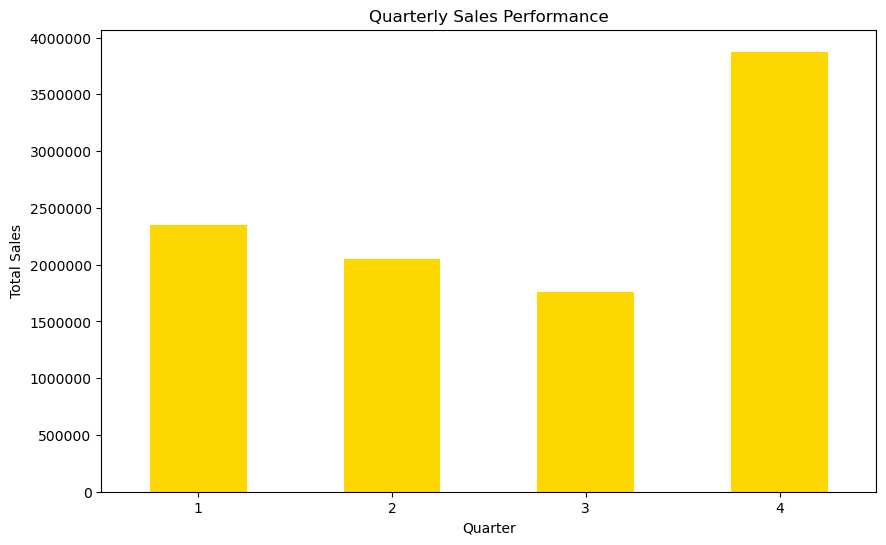

In [58]:
quarterly_sales = df.groupby('QTR_ID').agg(Total_Sales=('SALES', 'sum')).reset_index()

# Bar chart: Quarterly Sales
quarterly_sales.set_index('QTR_ID')['Total_Sales'].plot(
    kind='bar', figsize=(10, 6), color='gold', title='Quarterly Sales Performance'
)
plt.ylabel('Total Sales')
plt.xlabel('Quarter')
plt.xticks(rotation=0)  
plt.ticklabel_format(style='plain', axis='y')
plt.show()


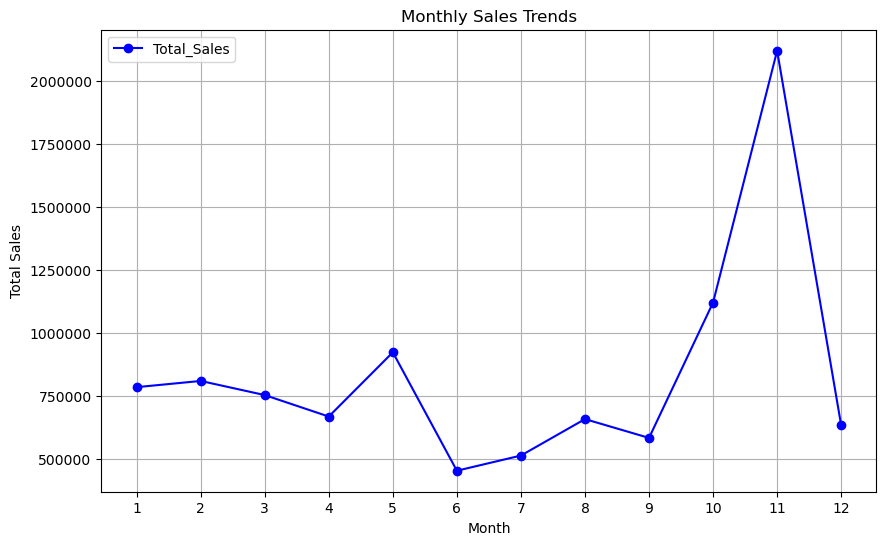

In [59]:
monthly_sales = df.groupby('MONTH_ID').agg(Total_Sales=('SALES', 'sum')).reset_index()

# Line chart: Monthly Sales
monthly_sales.plot(
    x='MONTH_ID', y='Total_Sales', kind='line', marker='o', figsize=(10, 6), color='blue', title='Monthly Sales Trends'
)
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(range(1, 13))  # Ensure all months are displayed
plt.grid()
plt.ticklabel_format(style='plain', axis='y')
plt.show()


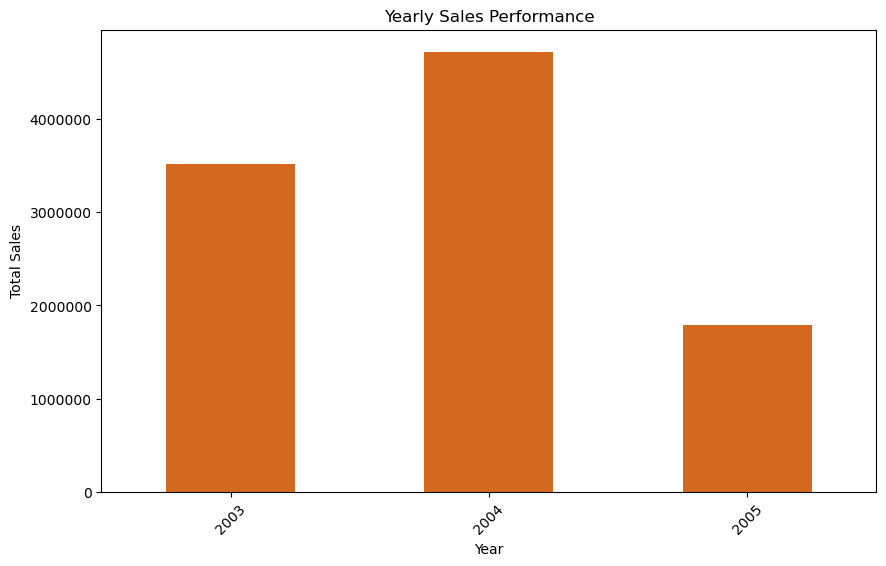

In [60]:
yearly_sales = df.groupby('YEAR_ID').agg(Total_Sales=('SALES', 'sum')).reset_index()

# Bar chart: Yearly Sales
yearly_sales.set_index('YEAR_ID')['Total_Sales'].plot(
    kind='bar', figsize=(10, 6), color='chocolate', title='Yearly Sales Performance'
)
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)  # Rotate x labels to prevent overlap
plt.show()


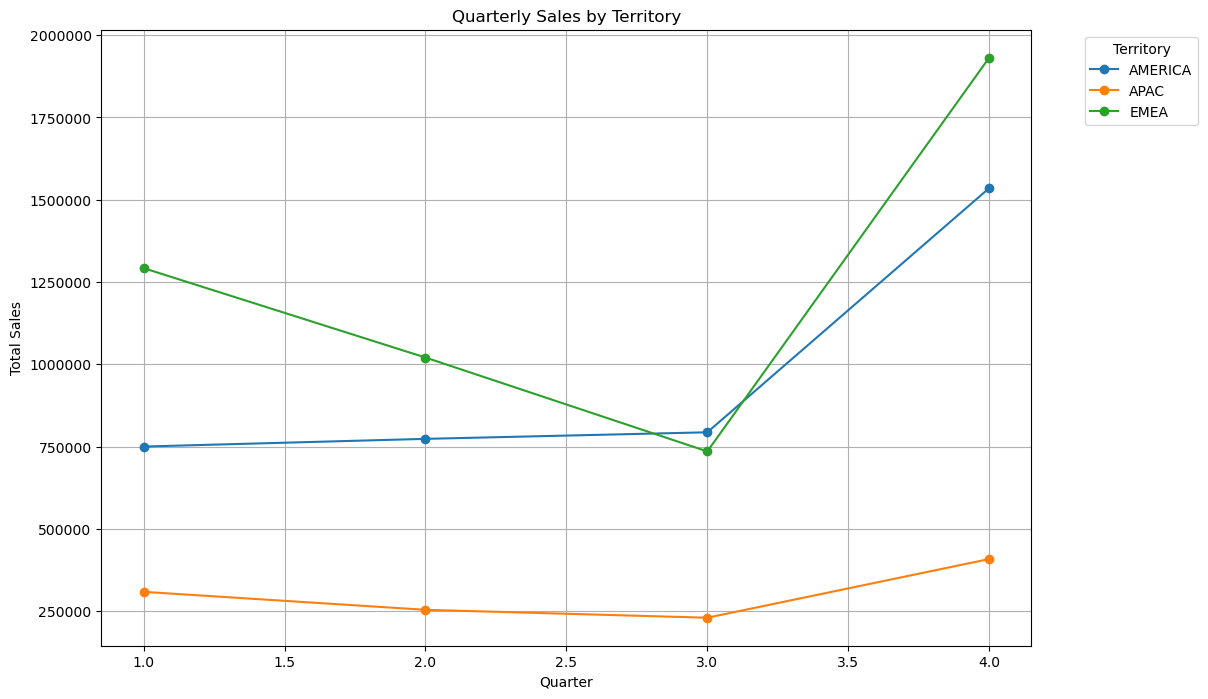

In [61]:
qtr_sales = df.groupby(['QTR_ID', 'TERRITORY'])['SALES'].sum().unstack()
qtr_sales.plot(figsize=(12, 8), kind='line', marker='o')
plt.title('Quarterly Sales by Territory')
plt.ylabel('Total Sales')
plt.xlabel('Quarter')
plt.legend(title='Territory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


In [62]:
#top_cities = df.groupby('CITY')['SALES'].sum().sort_values(ascending=False).head(10)
#top_cities.plot(kind='bar', color='#FF1493', figsize=(8, 6))
#plt.title('Top 10 Cities by Sales')
#plt.ylabel('Total Sales')
#plt.xlabel('City')
#plt.xticks(rotation=45)
#plt.ticklabel_format(style='plain', axis='y')
#plt.show()

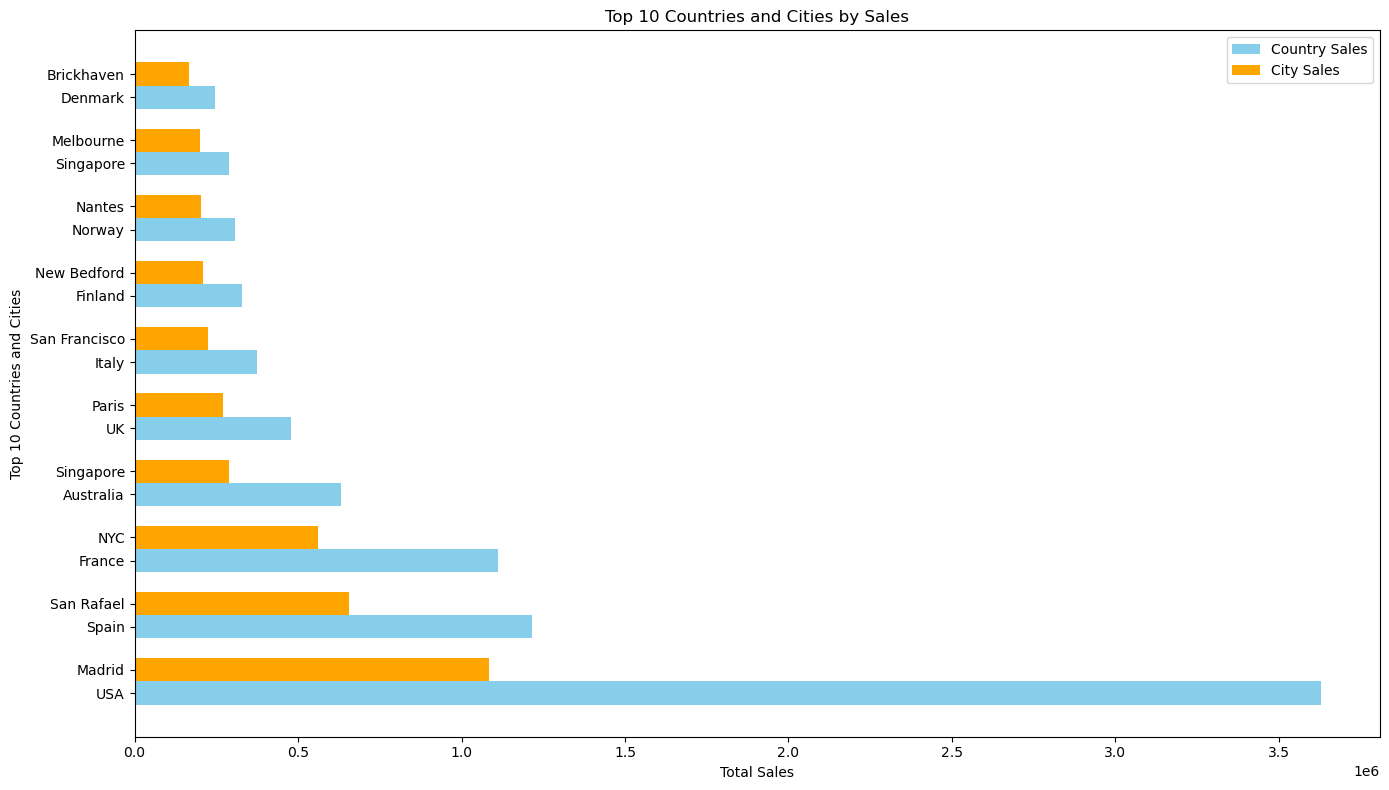

In [63]:
# Aggregate sales by Country and City
country_sales = df.groupby('COUNTRY').agg({'SALES': 'sum'}).reset_index()
city_sales = df.groupby('CITY').agg({'SALES': 'sum'}).reset_index()

# Get Top 10 countries and cities by sales
top_10_countries = country_sales.sort_values(by='SALES', ascending=False).head(10)
top_10_cities = city_sales.sort_values(by='SALES', ascending=False).head(10)

# Create subplots for better visualization
fig, ax = plt.subplots(figsize=(14, 8))

# Bar width
bar_width = 0.35

# Set positions for the bars
country_index = range(len(top_10_countries))
city_index = range(len(top_10_cities))

# Plotting Country sales
ax.barh(country_index, top_10_countries['SALES'], bar_width, label='Country Sales', color='skyblue')

# Plotting City sales
ax.barh([i + bar_width for i in city_index], top_10_cities['SALES'], bar_width, label='City Sales', color='orange')

# Labeling the chart
ax.set_xlabel('Total Sales')
ax.set_ylabel('Top 10 Countries and Cities')
ax.set_title('Top 10 Countries and Cities by Sales')
ax.set_yticks(list(country_index) + [i + bar_width for i in city_index])
ax.set_yticklabels(list(top_10_countries['COUNTRY']) + list(top_10_cities['CITY']))
ax.legend()

plt.tight_layout()
plt.show()

In [64]:
# e: Apply inferential statistical method to quantify the relationships between variables.

<Axes: title={'center': 'Scatter Plot of Hours and Scores Percentages'}, xlabel='QUANTITYORDERED', ylabel='SALES'>

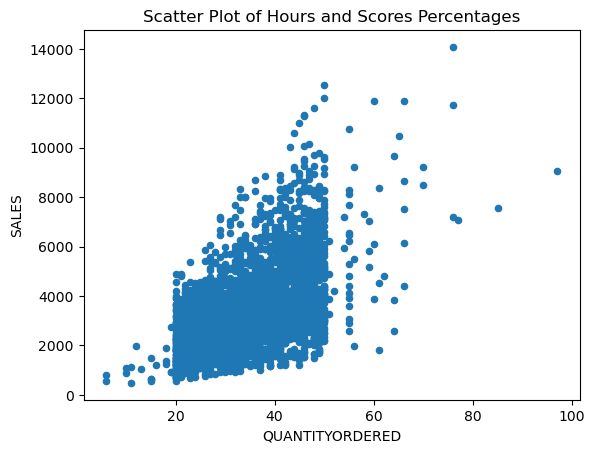

In [144]:
df.plot.scatter(x='QUANTITYORDERED',y='SALES',title='Scatter Plot of Hours and Scores Percentages')

In [66]:
# Applying Pearson correlation

from scipy.stats import pearsonr
correlation, p_value = pearsonr(df['SALES'], df['PRICEEACH'])
print(f"Correlation: {correlation}, P-value: {p_value}")

Correlation: 0.6578409283176943, P-value: 0.0


In [67]:
#Correlation Analysis: There is a moderate positive correlation between PRICEEACH and SALES
#Indicationg that higher unit price tend to lead to higher sales.

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define independent and dependent variables
X = df[['QUANTITYORDERED', 'PRICEEACH']]
y = df['SALES']

# Create and train the linear regression model
model_linear = LinearRegression()
model_linear.fit(X, y)

# Get predictions for linear regression
y_pred_linear = model_linear.predict(X)

# Calculate Mean Squared Error
mse_linear = mean_squared_error(y, y_pred_linear)
print(f"MSE (Linear Regression): {mse_linear}")

# R-squared value
r_squared_linear = model_linear.score(X, y)
print(f"R-squared (Linear Regression): {r_squared_linear}")

MSE (Linear Regression): 906107.0843232493
R-squared (Linear Regression): 0.7328115047041691


In [69]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define the independent and dependent variables
X = df[['QUANTITYORDERED', 'PRICEEACH']]
y = df['SALES']

# Create and fit the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X, y)

# Predict using the Ridge regression model
y_pred_ridge = ridge_model.predict(X)

# Evaluate the model
mse_ridge = mean_squared_error(y, y_pred_ridge)
r2_ridge = r2_score(y, y_pred_ridge)

print(f"MSE (Ridge Regression): {mse_ridge}")
print(f"R-squared (Ridge Regression): {r2_ridge}")

MSE (Ridge Regression): 906107.0843384976
R-squared (Ridge Regression): 0.7328115046996728


In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the independent and dependent variables
X = df[['QUANTITYORDERED', 'PRICEEACH']]
y = df['SALES']

# Create and fit the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42, max_depth=5)  # You can adjust max_depth for complexity
tree_model.fit(X, y)

# Predict using the Decision Tree model
y_pred_tree = tree_model.predict(X)

# Evaluate the model
mse_tree = mean_squared_error(y, y_pred_tree)
r2_tree = r2_score(y, y_pred_tree)

# Output evaluation metrics
print(f"MSE (Decision Tree): {mse_tree}")
print(f"R-squared (Decision Tree): {r2_tree}")


MSE (Decision Tree): 617368.448159821
R-squared (Decision Tree): 0.8179533638343144


In [71]:
#TASK C: DATA FINDINGS AND DECISION SUPPORT

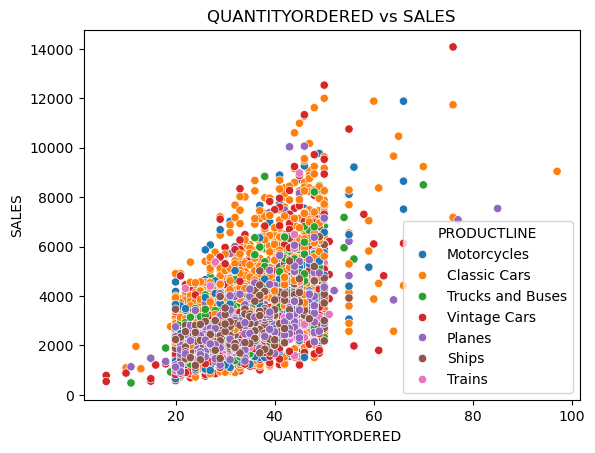

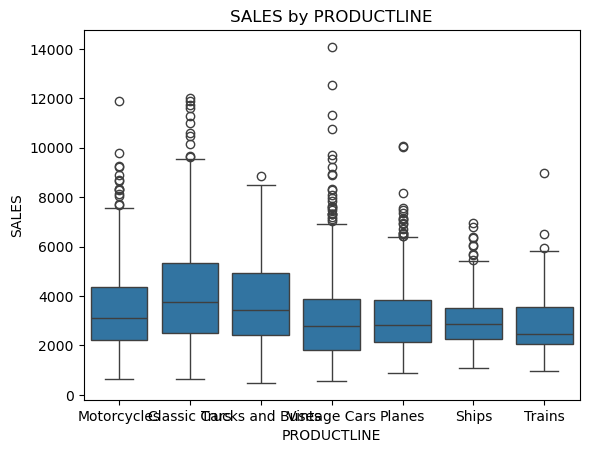

In [72]:
sns.scatterplot(data=df, x='QUANTITYORDERED', y='SALES', hue='PRODUCTLINE')
plt.title('QUANTITYORDERED vs SALES')
plt.show()

sns.boxplot(data=df, x='PRODUCTLINE', y='SALES')
plt.title('SALES by PRODUCTLINE')
plt.show()


In [73]:
#1.Analyse the results obtained from data analysis, including grouping, summarizing, investigating correlations, and applying inferential statistical methods.